# LBYA CRISIS ANALYSIS FILE

## Overview

This file contains some preliminary analyses to see how has terrorism evolved in the Sahel region after the fall of Ghadaffi’s regime. 

Ghadaffi’s regime fell in 2011 after NATO intervention in Lybia. Following the fall of the regime, terrorism(terrorist attacks) has become more rampant in several countries. Political leaders and social activists in many countries have attributed it to the regime collapse in Libya. However, to the best of our knowledge there are no studies that investigates the effect of the fall of Ghadaffi’s regime on terrorism in the Sahel region. 

Our treated group are countries in the Sahel. The control group are all other African countries except countries adjacent to Lybia.

Below we focus on violence against civilians committed by rebel groups. The definition of revel group encompasses terrorist groups. In further analysis, we willl limit the list of actors to only consider terrorist groups.

We will also merge the ACLED data with DHS data and MICS data and investigate the effect of being exposed to terrorist attacks (in vitro and after birth) on early childhood development outcomes. We will also look at some adult outcomes.

In [2]:
## Loading the necessary librairies
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## Rethis working directory

In [3]:
#import os
#os.getcwd()
#os.chdir('C:/Users/Yoga/Box/LBYA/')

## Mahounan working directory

In [4]:
#import os
#os.getcwd()
#os.chdir('/Users/yedomiffi/Library/CloudStorage/Box-Box/Documents/PhD/Research/LBYA')

## Loading the database (directly from GitHub)

 What we want to sell in this paper is the terrorism aspect:

    a. More terrorist attacks
    b. More violences against civilians
    c. More fatalities among civilians as well as armed forces

In the following, we will only consider violence against civilians by terrorist groups. 
The variable INTER takes the value 2 for Rebel Groups

In [5]:
rowdata = pd.read_excel("Data/Africa_1997-2022_Jul22.xlsx")

dataset = rowdata[rowdata['EVENT_TYPE'] == 'Violence against civilians' ]
dataset = dataset[dataset['INTER1'] == 2 ]
dataset

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,1997-01-02,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,1997-01-03,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,1997-01-04,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,1997-01-05,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285778,894,ZAM41,41,1999-09-23,1999,1,Violence against civilians,Abduction/forced disappearance,UNITA: National Union for the Total Independen...,NaN,...,NaN,Mwinilunga,-11.850,24.367,1,All Africa,Regional,8 Zambians abducted by UNITA. 5 escape and rai...,0,1552577668
285782,894,ZAM45,45,2000-03-06,2000,1,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,...,NaN,Chavuma,-13.067,22.683,1,All Africa,Regional,Reports of ongoing raids on Zambian civilians,0,1552577666
285786,894,ZAM49,49,2000-04-28,2000,1,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,...,NaN,Chavuma,-13.067,22.683,1,All Africa,Regional,Suspected UNITA attack villages,0,1552577665
285798,894,ZAM61,61,2000-09-26,2000,1,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,...,NaN,Chavuma,-13.067,22.683,1,Angola Peace Monitor,Other,NaN,0,1567462138


## Aggregated data

ACLED data is collected on a daily basis according to the localities where the events occur. 
We will aggregate these data by country, year, type of event and by the first administrative level (ADMIN1).

We therefore create three variables:

    1- EVENT_FATALITIES: which contains the sum of the total number of deaths after the events according to the level of disaggregation mentioned above.

    2- EVENT_FREQUENCIES : which includes the total number of terrorist attacks 

    3- EVENT_ADMIN2: which gives the total number of administrative units in which terrorist attacks took place.

In [6]:
dataset_fatalities = dataset.groupby(['ISO','COUNTRY','YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1'])['FATALITIES'].sum().reset_index(name='EVENT_FATALITIES')
dataset_event = dataset.groupby(['ISO','COUNTRY', 'YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE'])['ADMIN1'].value_counts().reset_index(name='EVENT_FREQUENCIES')
EVENT_ADMIN2 = dataset.groupby(['ISO','COUNTRY', 'YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1'])['ADMIN2'].nunique().reset_index(name='EVENT_ADMIN2')

In [7]:
dataset_event

,ISO,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FREQUENCIES
0,12,Algeria,1997,Violence against civilians,Attack,Medea,26
1,12,Algeria,1997,Violence against civilians,Attack,Blida,21
2,12,Algeria,1997,Violence against civilians,Attack,Alger,14
3,12,Algeria,1997,Violence against civilians,Attack,Tipaza,11
4,12,Algeria,1997,Violence against civilians,Attack,Mascara,5
...,...,...,...,...,...,...,...
2168,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Est,3
2169,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Sahel,2
2170,894,Zambia,1999,Violence against civilians,Abduction/forced disappearance,North-Western,1
2171,894,Zambia,2000,Violence against civilians,Attack,North-Western,3


In [8]:
dataset_fatalities

,ISO,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES
0,12,Algeria,1997,Violence against civilians,Attack,Ain Defla,120
1,12,Algeria,1997,Violence against civilians,Attack,Ain Temouchent,49
2,12,Algeria,1997,Violence against civilians,Attack,Alger,540
3,12,Algeria,1997,Violence against civilians,Attack,Blida,517
4,12,Algeria,1997,Violence against civilians,Attack,Bordj Bou Arreridj,34
...,...,...,...,...,...,...,...
2168,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Est,0
2169,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Sahel,0
2170,894,Zambia,1999,Violence against civilians,Abduction/forced disappearance,North-Western,0
2171,894,Zambia,2000,Violence against civilians,Attack,North-Western,0


In [9]:
EVENT_ADMIN2

,ISO,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_ADMIN2
0,12,Algeria,1997,Violence against civilians,Attack,Ain Defla,1
1,12,Algeria,1997,Violence against civilians,Attack,Ain Temouchent,2
2,12,Algeria,1997,Violence against civilians,Attack,Alger,8
3,12,Algeria,1997,Violence against civilians,Attack,Blida,9
4,12,Algeria,1997,Violence against civilians,Attack,Bordj Bou Arreridj,2
...,...,...,...,...,...,...,...
2168,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Est,2
2169,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Sahel,2
2170,894,Zambia,1999,Violence against civilians,Abduction/forced disappearance,North-Western,1
2171,894,Zambia,2000,Violence against civilians,Attack,North-Western,1


## Merging and renaming of variables

In [10]:
evenT = pd.merge(dataset_fatalities, dataset_event, on=["ISO",'COUNTRY',"YEAR",'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1' ])
evenT = pd.merge(evenT, EVENT_ADMIN2, on=["ISO",'COUNTRY',"YEAR",'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1' ])
evenT = pd.DataFrame(evenT, columns=['ISO','COUNTRY','YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1','EVENT_FATALITIES','EVENT_FREQUENCIES','EVENT_ADMIN2'])
evenT.columns = ['Numeric code','COUNTRY','YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE','ADMIN1','EVENT_FATALITIES','EVENT_FREQUENCIES','EVENT_ADMIN2']

In [11]:
evenT

,Numeric code,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES,EVENT_FREQUENCIES,EVENT_ADMIN2
0,12,Algeria,1997,Violence against civilians,Attack,Ain Defla,120,4,1
1,12,Algeria,1997,Violence against civilians,Attack,Ain Temouchent,49,2,2
2,12,Algeria,1997,Violence against civilians,Attack,Alger,540,14,8
3,12,Algeria,1997,Violence against civilians,Attack,Blida,517,21,9
4,12,Algeria,1997,Violence against civilians,Attack,Bordj Bou Arreridj,34,2,2
...,...,...,...,...,...,...,...,...,...
2168,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Est,0,3,2
2169,854,Burkina Faso,2022,Violence against civilians,Sexual violence,Sahel,0,2,2
2170,894,Zambia,1999,Violence against civilians,Abduction/forced disappearance,North-Western,0,1,1
2171,894,Zambia,2000,Violence against civilians,Attack,North-Western,0,3,1


Here we load a database containing the ISO codes of the different countries. 

In [12]:
ISO = pd.read_csv("wikipedia-iso-country-codes.csv")
ISO.columns = ['country','Alpha-2 code','ISO','Numeric code','ISO 3166-2']

In [13]:
ISO

,country,Alpha-2 code,ISO,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


We use the 'numeric code' of the countries to extract  their ISO codes.
These ISO codes will allow us to merge our database with the shapefile to be able to create the maps

In [14]:
df_new = pd.merge(ISO, evenT, how='right', on='Numeric code' )

In [15]:
df_new

,country,Alpha-2 code,ISO,Numeric code,ISO 3166-2,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES,EVENT_FREQUENCIES,EVENT_ADMIN2
0,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Algeria,1997,Violence against civilians,Attack,Ain Defla,120,4,1
1,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Algeria,1997,Violence against civilians,Attack,Ain Temouchent,49,2,2
2,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Algeria,1997,Violence against civilians,Attack,Alger,540,14,8
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Algeria,1997,Violence against civilians,Attack,Blida,517,21,9
4,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Algeria,1997,Violence against civilians,Attack,Bordj Bou Arreridj,34,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,Burkina Faso,BF,BFA,854,ISO 3166-2:BF,Burkina Faso,2022,Violence against civilians,Sexual violence,Est,0,3,2
2169,Burkina Faso,BF,BFA,854,ISO 3166-2:BF,Burkina Faso,2022,Violence against civilians,Sexual violence,Sahel,0,2,2
2170,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Zambia,1999,Violence against civilians,Abduction/forced disappearance,North-Western,0,1,1
2171,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Zambia,2000,Violence against civilians,Attack,North-Western,0,3,1


## Loading the shapefile

In [16]:
import geopandas as gpd
shapefile = 'map/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'ISO', 'geometry']
gdf

,country,ISO,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...
172,Republic of Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Merging the shapefile data with the evenT database

In [17]:
merged = pd.merge(gdf, df_new, how='right', on='ISO', validate = '1:m')

In order to perform our analyses, we define below the countries to be considered 
in the treaty group and in the control group. 

The countries in the treaty group are those in the Sahel zone.
For the control group, we exclude all the countries adjacent to libya

In [18]:
# Treated group
sahel_countries = ['Cameroon','Burkina Faso','Chad','South Sudan','Eritrea','Mauritania','Mali','Niger','Nigeria','Senegal','Algeria','Sudan','Libya']
# Control group
controled_countries = ['Kenya','Rwanda','Somalia',"Sierra Leone",'Liberia','Zambia','Angola','Burundi','Tanzania','Namibia','Angola']

#controled_countries = ['Benin','Ethiopia','Gabon','Ghana','Ivory Coast','Kenya','Rwanda','Somalia','Uganda','Togo','Liberia','Central African Republic','Angola','Burundi']
# study countries
study_countries = sahel_countries + controled_countries

In this study, we consider countries where terrorist attacks against civilians took place between 2000 and 2020, i.e. about 10 years before and after the fall of the Gaddafi regime in 2011.

In [19]:
merged = merged[merged['YEAR'] >=2000]
merged = merged[merged['YEAR'] <=2020]

# We define the variable PERIOD which takes the value 0 before 2011 and the value 1 in 2011 or after.
merged['PERIOD']=np.where(merged['YEAR']>=2011 ,1,0)
period_dictionary = {0 : 'Before 2011' , 1 : 'After 2011'}
merged['PERIOD'] = merged.apply(lambda x: period_dictionary.get(x['PERIOD'], 'Unknown'), axis=1)

# We define the variable TREATMENT which takes the value 0 for control countries and the value 1 for Sahel countries (treated group).
merged['TREATMENT']=np.where(merged['COUNTRY'].isin(sahel_countries),1,0)
treatment_dictionary = {0 : 'Control' , 1 : 'Treated'}
merged['TREATMENT'] = merged.apply(lambda x: treatment_dictionary.get(x['TREATMENT'], 'Unknown'), axis=1)

# For the following, only the countries of the treaty and control group are included
first_final_df = merged[merged['COUNTRY'].isin(study_countries)]

restricted_final_df = first_final_df

In [20]:
merged

,country_x,ISO,geometry,country_y,Alpha-2 code,Numeric code,ISO 3166-2,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES,EVENT_FREQUENCIES,EVENT_ADMIN2,PERIOD,TREATMENT
43,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Ain Defla,28,4,3,Before 2011,Treated
44,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Alger,70,5,0,Before 2011,Treated
45,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Annaba,0,1,1,Before 2011,Treated
46,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Blida,25,2,2,Before 2011,Treated
47,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Bouira,7,3,2,Before 2011,Treated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Nord,13,7,3,After 2011,Treated
2133,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Sahel,181,63,4,After 2011,Treated
2134,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Sexual violence,Centre-Nord,0,1,1,After 2011,Treated
2171,Zambia,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,ZM,894,ISO 3166-2:ZM,Zambia,2000,Violence against civilians,Attack,North-Western,0,3,1,Before 2011,Control


## Data Visualization

#### EVENT_FREQUENCIES

The graph below represents the distribution of the total number of events recorded per 
country according to whether the country is in the treatment group or the control group.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Burundi'),
  Text(3, 0, 'Cameroon'),
  Text(4, 0, 'Chad'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Liberia'),
  Text(7, 0, 'Libya'),
  Text(8, 0, 'Mali'),
  Text(9, 0, 'Mauritania'),
  Text(10, 0, 'Namibia'),
  Text(11, 0, 'Niger'),
  Text(12, 0, 'Nigeria'),
  Text(13, 0, 'Rwanda'),
  Text(14, 0, 'Senegal'),
  Text(15, 0, 'Sierra Leone'),
  Text(16, 0, 'Somalia'),
  Text(17, 0, 'South Sudan'),
  Text(18, 0, 'Sudan'),
  Text(19, 0, 'Tanzania'),
  Text(20, 0, 'Burkina Faso'),
  Text(21, 0, 'Zambia')])

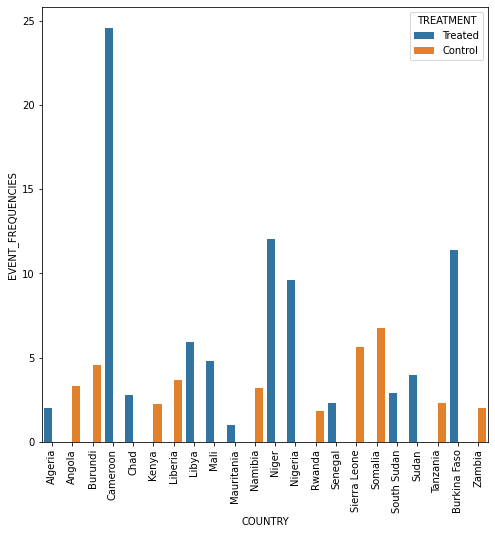

In [21]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="COUNTRY", y="EVENT_FREQUENCIES", hue="TREATMENT", data=restricted_final_df, ci=None)
plt.xticks(rotation=90)

The graph below represents the distribution of the total number of events recorded before and after 2011 for all countries 

PERIOD
After 2011     5564
Before 2011    1705
Name: EVENT_FREQUENCIES, dtype: int64


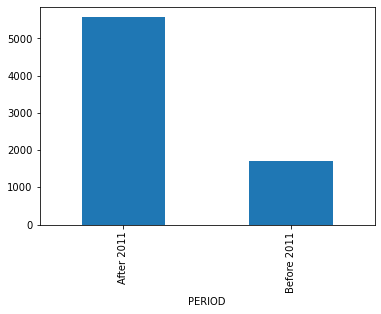

In [22]:
print(restricted_final_df.groupby('PERIOD')['EVENT_FREQUENCIES'].sum())
restricted_final_df.groupby('PERIOD')['EVENT_FREQUENCIES'].sum().plot.bar()
plt.show()

The graph below represents the distribution of the total number of events recorded according to the treatment status (treatment group or control group) before and after 2011.

<AxesSubplot:xlabel='PERIOD', ylabel='EVENT_FREQUENCIES'>

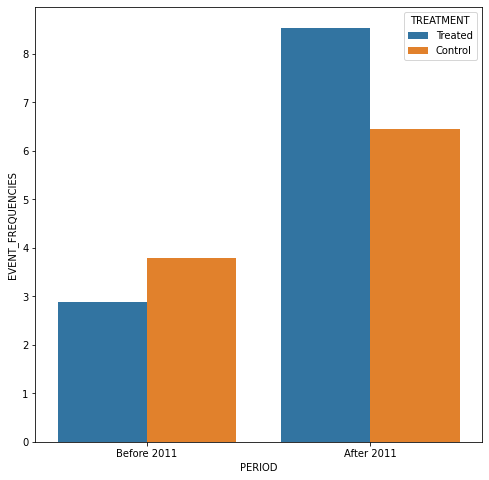

In [23]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="PERIOD", y="EVENT_FREQUENCIES", hue="TREATMENT", data=restricted_final_df, ci=None)

#### EVENT_FATALITIES

The graph below represents the distribution of the total number of events fatalities recorded per country according to whether the country is in the treatment group or the control group.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Burundi'),
  Text(3, 0, 'Cameroon'),
  Text(4, 0, 'Chad'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Liberia'),
  Text(7, 0, 'Libya'),
  Text(8, 0, 'Mali'),
  Text(9, 0, 'Mauritania'),
  Text(10, 0, 'Namibia'),
  Text(11, 0, 'Niger'),
  Text(12, 0, 'Nigeria'),
  Text(13, 0, 'Rwanda'),
  Text(14, 0, 'Senegal'),
  Text(15, 0, 'Sierra Leone'),
  Text(16, 0, 'Somalia'),
  Text(17, 0, 'South Sudan'),
  Text(18, 0, 'Sudan'),
  Text(19, 0, 'Tanzania'),
  Text(20, 0, 'Burkina Faso'),
  Text(21, 0, 'Zambia')])

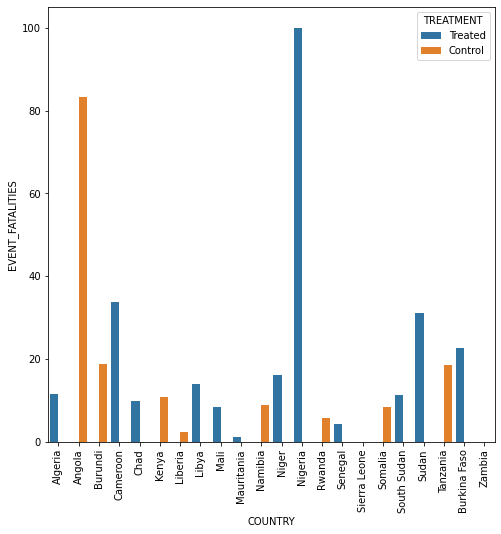

In [24]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="COUNTRY", y="EVENT_FATALITIES", hue="TREATMENT", data=restricted_final_df, ci=None)
plt.xticks(rotation=90)

The graph below represents the distribution of the total number of events fatalities recorded before and after 2011 for all countries

PERIOD
After 2011     18651
Before 2011    10647
Name: EVENT_FATALITIES, dtype: int64


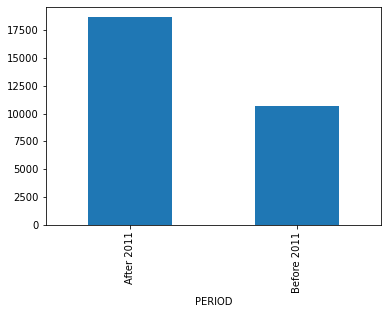

In [25]:
print(restricted_final_df.groupby('PERIOD')['EVENT_FATALITIES'].sum())
restricted_final_df.groupby('PERIOD')['EVENT_FATALITIES'].sum().plot.bar()
plt.show()

The graph below represents the distribution of the total number of events fatalities recorded according to the treatment status (treatment group or control group) before and after 2011.

<AxesSubplot:xlabel='PERIOD', ylabel='EVENT_FATALITIES'>

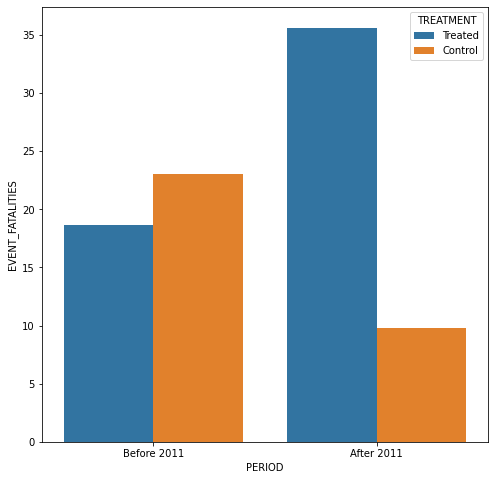

In [26]:
# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="PERIOD", y="EVENT_FATALITIES", hue="TREATMENT", data=restricted_final_df, ci=None)

## Placebo test

In [34]:
placebo= df_new

placebo = placebo[placebo['YEAR'] >=2000]
placebo = placebo[placebo['YEAR'] <=2020]

placebo['TREATMENT']=np.where(placebo['COUNTRY'].isin(sahel_countries),1,0)
treatment_dictionary = {0 : 'Control' , 1 : 'Treated'}
placebo['TREATMENT'] = placebo.apply(lambda x: treatment_dictionary.get(x['TREATMENT'], 'Unknown'), axis=1)

placebo['PERIOD']=np.where(placebo['YEAR']>=2011 ,1,0)
period_dictionary = {0 : 'Before 2011' , 1 : 'After 2011'}
placebo['PERIOD'] = placebo.apply(lambda x: period_dictionary.get(x['PERIOD'], 'Unknown'), axis=1)


placebo_Fatalities_res = placebo.groupby(['YEAR','TREATMENT','PERIOD'])['EVENT_FATALITIES'].sum().reset_index(name='EVENT_FATALITIES')
placebo_Frequencies_res = placebo.groupby(['YEAR','TREATMENT','PERIOD'])['EVENT_FREQUENCIES'].sum().reset_index(name='EVENT_FREQUENCIES')

#### EVENT_FATALITIES

The graph below shows the evolution of the total number of deaths caused by attacks, distributed according to the group treated (Sahelian countries) and control group. The red line indicates the year 2011 marking the beginning of the Libyan crisis.

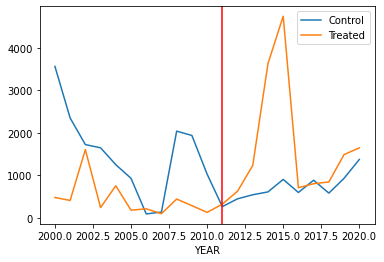

In [35]:
#define index column
placebo_Fatalities_res.set_index('YEAR', inplace=True)

#group data by product and display EVENT_FATALITIES as line chart
g = placebo_Fatalities_res.groupby('TREATMENT')['EVENT_FATALITIES'].plot(legend=True)
plt.axvline(x=2011, color='red')

#### EVENT_FREQUENCIES

The graph below shows the evolution of the total number of attacks that took place, distributed according to the group treated (Sahelian countries) and the group controlled. The red line indicates the year 2011 marking the beginning of the Libyan crisis.

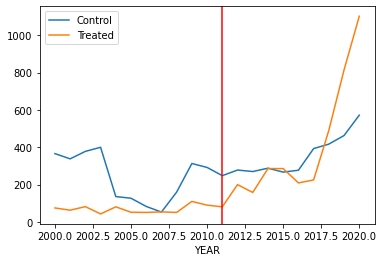

In [36]:
#define index column
placebo_Frequencies_res.set_index('YEAR', inplace=True)

#group data by product and display EVENT_FATALITIES as line chart
placebo_Frequencies_res.groupby('TREATMENT')['EVENT_FREQUENCIES'].plot(legend=True)
plt.axvline(x=2011, color='red')

## Mapping

In [37]:
EVENT_FATALITIES_df1 = restricted_final_df.groupby(['COUNTRY'])['EVENT_FATALITIES'].sum().reset_index(name='EVENT_FATALITIES')
EVENT_FREQUENCIES_df1 = restricted_final_df.groupby(['COUNTRY'])['EVENT_FREQUENCIES'].sum().reset_index(name='EVENT_FREQUENCIES')


EVENT_FATALITIES_df2 = restricted_final_df.groupby(['COUNTRY','YEAR'])['EVENT_FATALITIES'].sum().reset_index(name='EVENT_FATALITIES')
EVENT_FREQUENCIES_df2 = restricted_final_df.groupby(['COUNTRY','YEAR'])['EVENT_FREQUENCIES'].sum().reset_index(name='EVENT_FREQUENCIES')
restricted_year_agregeted_df2 = pd.DataFrame(EVENT_FATALITIES_df2,EVENT_FREQUENCIES_df2 )
restricted_final_df

,country_x,ISO,geometry,country_y,Alpha-2 code,Numeric code,ISO 3166-2,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES,EVENT_FREQUENCIES,EVENT_ADMIN2,PERIOD,TREATMENT
43,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Ain Defla,28,4,3,Before 2011,Treated
44,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Alger,70,5,0,Before 2011,Treated
45,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Annaba,0,1,1,Before 2011,Treated
46,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Blida,25,2,2,Before 2011,Treated
47,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Bouira,7,3,2,Before 2011,Treated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Nord,13,7,3,After 2011,Treated
2133,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Sahel,181,63,4,After 2011,Treated
2134,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Sexual violence,Centre-Nord,0,1,1,After 2011,Treated
2171,Zambia,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,ZM,894,ISO 3166-2:ZM,Zambia,2000,Violence against civilians,Attack,North-Western,0,3,1,Before 2011,Control


In [38]:
#Plotly Components
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [39]:
EVENT_FATALITIES_df2['PERIOD']=np.where(EVENT_FATALITIES_df2['YEAR']>=2011 ,1,0)
EVENT_FATALITIES_df2

,COUNTRY,YEAR,EVENT_FATALITIES,PERIOD
0,Algeria,2000,445,0
1,Algeria,2001,348,0
2,Algeria,2002,337,0
3,Algeria,2003,141,0
4,Algeria,2004,61,0
...,...,...,...,...
215,Tanzania,2001,15,0
216,Tanzania,2002,38,0
217,Tanzania,2007,3,0
218,Zambia,2000,0,0


The graph below represents the evolution of the total number of deaths caused by the attacks in all the countries concerned by our study (treatment group and control group)

In [42]:
#Creating the visualization


fig = go.Figure(data=go.Choropleth( locations = EVENT_FATALITIES_df1['COUNTRY'], locationmode = 'country names', z = EVENT_FATALITIES_df1['EVENT_FATALITIES'], colorscale = 'Reds', marker_line_color = 'black', marker_line_width = 0.5, ))

fig.update_layout( title_text = '', title_x = 0.5, geo=dict( showframe = False, showcoastlines = False, projection_type = 'equirectangular' ) ) 
fig.show()

The following graph represents the evolution of the total number of attacks that took place in all the countries concerned by our study (treatment group and control group)

In [43]:
#Creating the visualization
fig2 = go.Figure(data=go.Choropleth( locations = EVENT_FREQUENCIES_df1['COUNTRY'], locationmode = 'country names', z = EVENT_FREQUENCIES_df1['EVENT_FREQUENCIES'], colorscale = 'Reds', marker_line_color = 'black', marker_line_width = 0.5,  ))
fig2.update_layout( title_text = '', title_x = 0.5, geo=dict( showframe = False, showcoastlines = False, projection_type = 'equirectangular' ) ) 
fig2.show()

The graph below represents the evolution **by year** of the total number of deaths caused by the attacks in all the countries concerned by our study (treatment group and control group)

In [45]:
#Creating the visualization 
fig3 = px.choropleth(EVENT_FATALITIES_df2, locations="COUNTRY", locationmode = "country names", color="EVENT_FATALITIES", hover_name="COUNTRY", animation_frame="YEAR", color_continuous_scale=["green","yellow","olive","gold","orange","coral", "tomato" ,"maroon", "red"], range_color  = (0,4000))  
fig3.update_layout( title_text = '', title_x = 0.5, geo=dict( showframe = False, showcoastlines = False, )) 
fig3.show()

The following graph represents the evolution **by year** of the total number of attacks that took place in all the countries concerned by our study (treatment group and control group)

In [46]:
#Creating the visualization 
fig4 = px.choropleth(EVENT_FREQUENCIES_df2, locations="COUNTRY", locationmode = "country names", color="EVENT_FREQUENCIES", hover_name="COUNTRY", animation_frame="YEAR" , color_continuous_scale=["green","yellow","olive","gold","orange","coral", "tomato" ,"maroon", "red"], range_color  = (0,400)) 
fig4.update_layout( title_text = '', title_x = 0.5, geo=dict( showframe = False, showcoastlines = False, )) 
fig4.show()

# Diff in Diff analysis

Here we conduct **preliminary analyses** using the Diff in Diff method to assess 
the impact of the Libyan crisis on insecurity in the Sahel zone. 

To assess this impact, we focus only on terrorist attacks on civilians. This choice is motivated by several reasons. 

    1- Indeed, for other types of events, such as attacks between rebels and armed forces, it is not clear who caused the attack. Also, the data do not allow us to know the exact number of deaths on each side. 
    2- In attacks on civilians, however, we can be sure that it was the rebel groups that engaged in the attack, and the deaths are usually on the civilian side.

In [48]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit
from statsmodels.tools import add_constant
import statsmodels as sm
import statsmodels.formula.api as smf
import math as mt
from IPython.display import display
from sklearn import linear_model

In [49]:
restricted_final_df

,country_x,ISO,geometry,country_y,Alpha-2 code,Numeric code,ISO 3166-2,COUNTRY,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ADMIN1,EVENT_FATALITIES,EVENT_FREQUENCIES,EVENT_ADMIN2,PERIOD,TREATMENT
43,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Ain Defla,28,4,3,Before 2011,Treated
44,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Alger,70,5,0,Before 2011,Treated
45,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Annaba,0,1,1,Before 2011,Treated
46,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Blida,25,2,2,Before 2011,Treated
47,Algeria,DZA,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,DZ,12,ISO 3166-2:DZ,Algeria,2000,Violence against civilians,Attack,Bouira,7,3,2,Before 2011,Treated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Nord,13,7,3,After 2011,Treated
2133,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Attack,Sahel,181,63,4,After 2011,Treated
2134,Burkina Faso,BFA,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,BF,854,ISO 3166-2:BF,Burkina Faso,2020,Violence against civilians,Sexual violence,Centre-Nord,0,1,1,After 2011,Treated
2171,Zambia,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,ZM,894,ISO 3166-2:ZM,Zambia,2000,Violence against civilians,Attack,North-Western,0,3,1,Before 2011,Control


In [50]:
restricted_final_df['P'] = np.where(restricted_final_df['YEAR']>=2011 ,1,0)
restricted_final_df['T'] = np.where(restricted_final_df['COUNTRY'].isin(sahel_countries),1,0)
restricted_final_df['INTER'] = restricted_final_df['P'] * restricted_final_df['T']

C:\Users\Yoga\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# import formula api as alias smf 
import statsmodels.formula.api as smf 
model = smf.ols(formula= 'EVENT_FREQUENCIES ~  INTER + C(COUNTRY) + C(YEAR) ', data=restricted_final_df).fit()
 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      EVENT_FREQUENCIES   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.010
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           6.58e-22
Time:                        02:47:27   Log-Likelihood:                -4804.3
No. Observations:                1227   AIC:                             9695.
Df Residuals:                    1184   BIC:                             9914.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [52]:
# import formula api as alias smf 
import statsmodels.formula.api as smf 
model = smf.ols(formula= 'EVENT_FATALITIES ~ INTER + C(COUNTRY) + C(YEAR) ', data=restricted_final_df).fit()
 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       EVENT_FATALITIES   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 05 Sep 2022   Prob (F-statistic):            0.00443
Time:                        02:47:36   Log-Likelihood:                -7783.6
No. Observations:                1227   AIC:                         1.565e+04
Df Residuals:                    1184   BIC:                         1.587e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In this **preliminary analysis**, the p-value associated with the INTER variable (which measures impact) is higher than 0.05 in the case where we consider the total number of terrorist attacks against civilians and the total number of deaths.

This would mean that, at a **5% risk of being wrong**, we can say that the Libyan crisis has no **significant impact on insecurity in the Sahel zone**, considering in each case the total number of terrorist attacks on civilians and the total number of deaths.

# Machine Learning Analysis

In progress